In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [5]:
salary=pd.read_csv('Salary_Data.csv')

In [11]:
salary.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


# Linear Regression from Scratch

In [15]:
class LinearRegression():
    def __init__(self,fit_intercept=True):
        self.num = 0
        self.den = 0
        self.m = 0
        self.c = 0
        self.fit_intercept = fit_intercept
    def fit(self,data_X,data_Y):
        mean_x=np.mean(data_X)
        mean_y=np.mean(data_Y)
        N=len(data_X)
        
        for i in range(N):
            self.num += ((data_X[i] - mean_x) * (data_Y[i] - mean_y))
            self.den += (data_X[i] - mean_x)**2
            self.m += self.num / self.den
            if self.fit_intercept==True:
                
                self.c += mean_y - (self.m * mean_x)
                
            else:
                self.b = 0
            return self
    def predict(self,test_X):
        y = self.m * test_X + self.c
        return y

In [28]:
X = np.array(salary.iloc[:,0].values)
y = np.array(salary.iloc[:,-1].values)
train_X , test_X , train_y,test_y=train_test_split(X,y,test_size=0.3 , random_state = 5 )

l = LinearRegression(fit_intercept=True)
l.fit(train_X,train_y)
y_pred = l.predict(test_X)
y_pred

array([ 62314.00431965, 137711.89848812, 111032.64362851, 120312.38444924,
        84353.3887689 ,  61154.03671706,  33314.81425486,  63473.97192225,
       126112.2224622 ])

In [31]:
print("R2_Score" , r2_score(test_y , y_pred))

R2_Score 0.9153225870278384


# Plotting the Best_Fit_Line

<function matplotlib.pyplot.show(*args, **kw)>

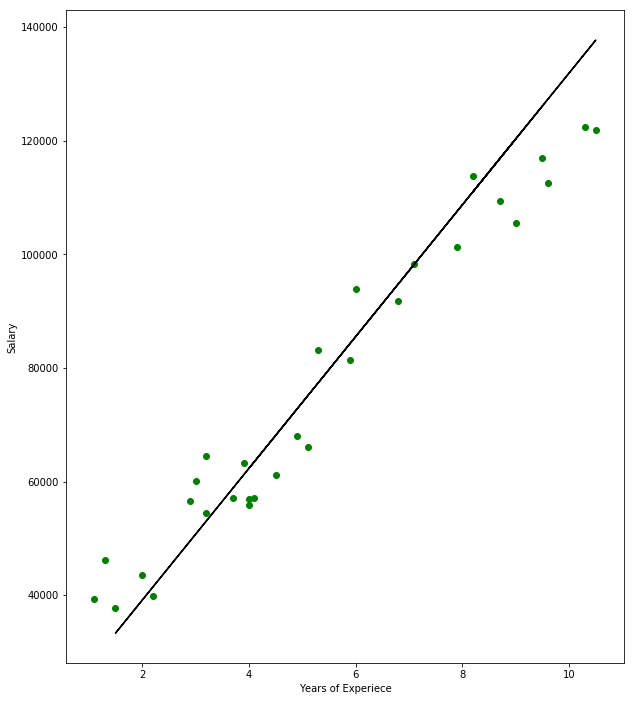

In [38]:
plt.figure(figsize=(10,12))
plt.plot(test_X,y_pred , color='black')
plt.scatter(X,y,color='green')
plt.xlabel("Years of Experiece")
plt.ylabel("Salary")
plt.show
